In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel("C:/Users/Kwame/Desktop/DS/PU/Project Work/Permit 2021.xlsx")
df2 = pd.read_excel("C:/Users/Kwame/Desktop/DS/PU/Project Work/Permits 2020.xlsx")

In [3]:
df1.head(2)

,Date Prepared,Chemical Name,Exporting/Importing Country,Quantity,Unit(Kg/L),Permit Type,Permit Number,Amount Paid,Date Issued
0,2020-12-17,TOLUENE-DI ISOCYANATE,China,160000.0,Kg,CLEARANCE PERMIT,NCCIP043202000317/12,2000.0,2021-01-05 00:00:00
1,2020-12-21,METHYL ETHYL KETONE,India,1330.0,Kg,CLEARANCE PERMIT,NCCIP028202000321/12,100.0,2021-01-05 00:00:00


In [4]:
df2.head(2)

,Date Prepared,Chemical Name,Exporting/Importing Country,Quantity,Unit(Kg/L),Permit Type,Permit Number,Amount Paid,Date Issued
0,2019-09-18,METHYL ETHYL KETONE,Netherlands,405.0,L,CLEARANCE PERMIT,NCBIPO28201900250/09,100.0,2020-02-07
1,2019-12-11,HYDROCHLORIC ACID,South Africa,115000.0,Kg,CLEARANCE PERMIT,NCBIP026201900296/12,1437.5,2020-01-13


In [5]:
new_data = df1.append(df2, ignore_index=False, verify_integrity=False, sort=None)

In [6]:
new_data.shape

(1039, 9)

In [7]:
df1.shape

(522, 9)

In [8]:
df2.shape

(517, 9)

In [9]:
df1.columns

Index(['Date Prepared', 'Chemical Name ', 'Exporting/Importing Country',
       'Quantity', 'Unit(Kg/L)', 'Permit Type', 'Permit Number', 'Amount Paid',
       'Date Issued '],
      dtype='object')

In [10]:
df2.columns

Index(['Date Prepared', 'Chemical Name ', 'Exporting/Importing Country',
       'Quantity', 'Unit(Kg/L)', 'Permit Type', 'Permit Number', 'Amount Paid',
       'Date Issued '],
      dtype='object')

In [11]:
new_data.to_excel('C:/Users/Kwame/Desktop/DS/PU/Project Work/new_data.xlsx',sheet_name="combined")

In [12]:
new_df = pd.read_excel("C:/Users/Kwame/Desktop/DS/PU/Project Work/new_data.xlsx")

In [13]:
new_df.head(2)

,Unnamed: 0,Date Prepared,Chemical Name,Exporting/Importing Country,Quantity,Unit(Kg/L),Permit Type,Permit Number,Amount Paid,Date Issued
0,0,2020-12-17,TOLUENE-DI ISOCYANATE,China,160000.0,Kg,CLEARANCE PERMIT,NCCIP043202000317/12,2000.0,2021-01-05 00:00:00
1,1,2020-12-21,METHYL ETHYL KETONE,India,1330.0,Kg,CLEARANCE PERMIT,NCCIP028202000321/12,100.0,2021-01-05 00:00:00


In [14]:
new_df.shape

(1039, 10)

In [15]:
new_df.dtypes

Unnamed: 0                              int64
Date Prepared                  datetime64[ns]
Chemical Name                          object
Exporting/Importing Country            object
Quantity                              float64
Unit(Kg/L)                             object
Permit Type                            object
Permit Number                          object
Amount Paid                           float64
Date Issued                            object
dtype: object

In [16]:
new_df.describe()

,Unnamed: 0,Quantity,Amount Paid
count,1039.000000,1039.000000,1020.000000
mean,259.256015,47647.951626,499.842779
std,150.049099,81727.719422,665.740733
min,0.000000,0.050000,30.000000
25%,129.500000,1296.000000,75.000000
50%,259.000000,24624.000000,174.000000
75%,389.000000,65640.000000,750.000000
max,521.000000,991800.000000,5933.250000


In [17]:
new_df = new_df.drop(['Unnamed: 0'], axis = 1)

In [18]:
new_df.describe()

,Quantity,Amount Paid
count,1039.000000,1020.000000
mean,47647.951626,499.842779
std,81727.719422,665.740733
min,0.050000,30.000000
25%,1296.000000,75.000000
50%,24624.000000,174.000000
75%,65640.000000,750.000000
max,991800.000000,5933.250000


<AxesSubplot:title={'center':'Bar plot of the Types of Permits'}, xlabel='Permit Type', ylabel='count'>

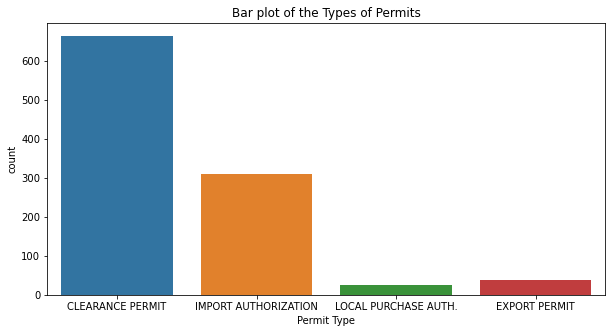

In [19]:
plt.figure(figsize=(10,5))
plt.title('Bar plot of the Types of Permits')
sns.countplot(x='Permit Type',data=new_df)

In [20]:
new_df['Permit Type'].value_counts()

CLEARANCE PERMIT        664
IMPORT AUTHORIZATION    311
EXPORT PERMIT            39
LOCAL PURCHASE AUTH.     25
Name: Permit Type, dtype: int64

In [21]:
pd.crosstab(new_df['Chemical Name '],new_df['Permit Type'])

Permit Type,CLEARANCE PERMIT,EXPORT PERMIT,IMPORT AUTHORIZATION,LOCAL PURCHASE AUTH.
Chemical Name,,,,
ACETIC ANHYDRIDE,1,0,5,0
ACETONE,65,0,43,0
CHLOROFORM,11,0,6,0
ETHYL ETHER,6,0,9,0
HYDROCHLORIC ACID,168,27,43,0
METHYL ETHYL KETONE,53,1,48,0
PHENYL ACETIC ACID,4,0,0,0
POTASSIUM PERMANGANATE,1,0,3,24
SULPHURIC ACID,151,11,20,1


<AxesSubplot:title={'center':'Bar plot of Permits issued for various chemicals against Amount paid'}, xlabel='Amount Paid', ylabel='Chemical Name '>

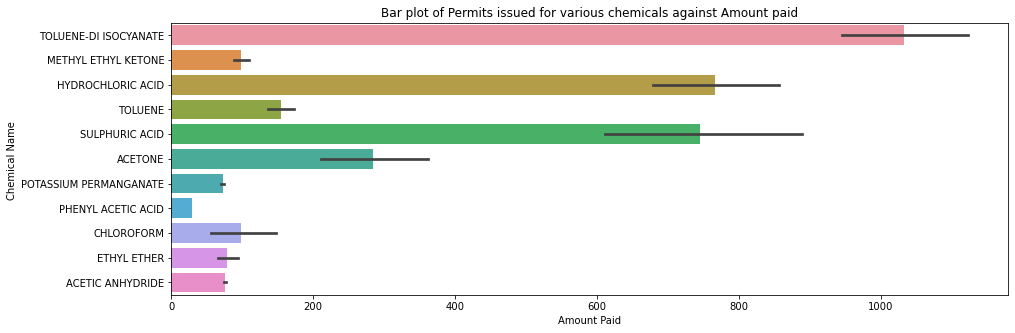

In [22]:
plt.figure(figsize=(15,5))
plt.title('Bar plot of Permits issued for various chemicals against Amount paid')
sns.barplot(x='Amount Paid', y='Chemical Name ', data=new_df)

In [23]:
new_df[new_df['Unit(Kg/L)'].str.contains('Kg')]

,Date Prepared,Chemical Name,Exporting/Importing Country,Quantity,Unit(Kg/L),Permit Type,Permit Number,Amount Paid,Date Issued
0,2020-12-17,TOLUENE-DI ISOCYANATE,China,160000.0,Kg,CLEARANCE PERMIT,NCCIP043202000317/12,2000.00,2021-01-05 00:00:00
1,2020-12-21,METHYL ETHYL KETONE,India,1330.0,Kg,CLEARANCE PERMIT,NCCIP028202000321/12,100.00,2021-01-05 00:00:00
2,2021-01-05,HYDROCHLORIC ACID,Belgium,45500.0,Kg,CLEARANCE PERMIT,NCCCP0262021001/01,568.75,2021-01-06 00:00:00
3,2021-01-05,TOLUENE,UAE,7560.0,Kg,IMPORT AUTHORIZATION,IP2021-043NCC001/01,75.00,2021-01-06 00:00:00
4,2021-01-05,TOLUENE,Germany,28800.0,Kg,IMPORT AUTHORIZATION,IP2021-043NCC002/01,75.00,2021-01-12 00:00:00
...,...,...,...,...,...,...,...,...,...
1032,2020-12-17,TOLUENE-DI ISOCYANATE,China,100000.0,Kg,CLEARANCE PERMIT,NCCIP043202000319/12,1250.00,2020-12-22 00:00:00
1034,2020-12-22,SULPHURIC ACID,Belgium,24624.0,Kg,CLEARANCE PERMIT,NCCIP017202000322/12,307.80,2020-12-30 00:00:00
1036,2020-12-29,TOLUENE,South Korea,27840.0,Kg,CLEARANCE PERMIT,NCCIP017202000324/12,348.00,2020-12-30 00:00:00
1037,2020-12-29,TOLUENE,South Korea,41760.0,Kg,CLEARANCE PERMIT,NCCIP043202000325/12,522.00,2020-12-30 00:00:00


In [24]:
df_kg = new_df[new_df['Unit(Kg/L)'].str.contains('Kg')]

<AxesSubplot:title={'center':'Bar plot of Precursor Chemicals Imported in Kilos'}, xlabel='Quantity', ylabel='Chemical Name '>

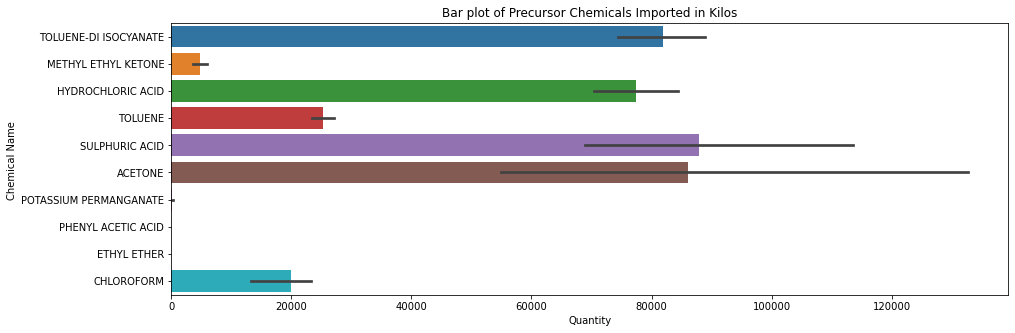

In [25]:
plt.figure(figsize=(15,5))
plt.title('Bar plot of Precursor Chemicals Imported in Kilos')
sns.barplot(x='Quantity', y='Chemical Name ', data=df_kg)

In [26]:
df_L = new_df[new_df['Unit(Kg/L)'].str.contains('L')]

In [27]:
df_L.head(2)

,Date Prepared,Chemical Name,Exporting/Importing Country,Quantity,Unit(Kg/L),Permit Type,Permit Number,Amount Paid,Date Issued
8,2021-01-06,METHYL ETHYL KETONE,Belgium,1254.4,L,CLEARANCE PERMIT,NCCCP0282021004/01,100.0,2021-01-11 00:00:00
21,2021-01-14,HYDROCHLORIC ACID,UK,4.0,L,IMPORT AUTHORIZATION,IP2021-026NCC005/01,75.0,2021-01-21 00:00:00


<AxesSubplot:title={'center':'Bar plot of Precursor Chemicals Imported in Litres'}, xlabel='Quantity', ylabel='Chemical Name '>

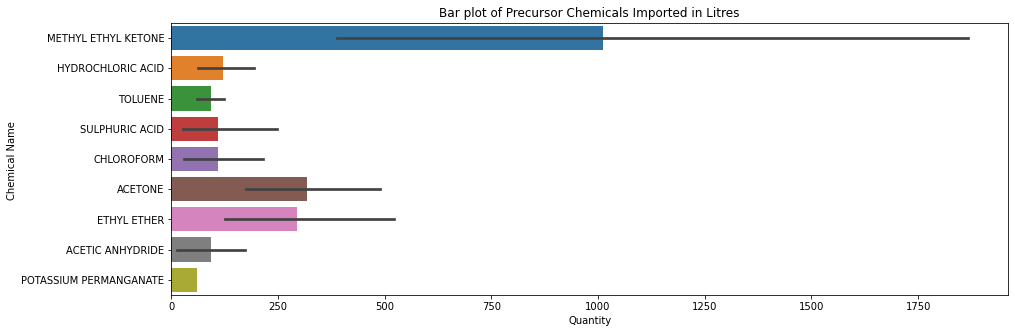

In [28]:
plt.figure(figsize=(15,5))
plt.title('Bar plot of Precursor Chemicals Imported in Litres')
sns.barplot(x='Quantity', y='Chemical Name ', data=df_L)

<AxesSubplot:title={'center':'Histogram of Amount Paid'}, xlabel='Amount Paid', ylabel='Count'>

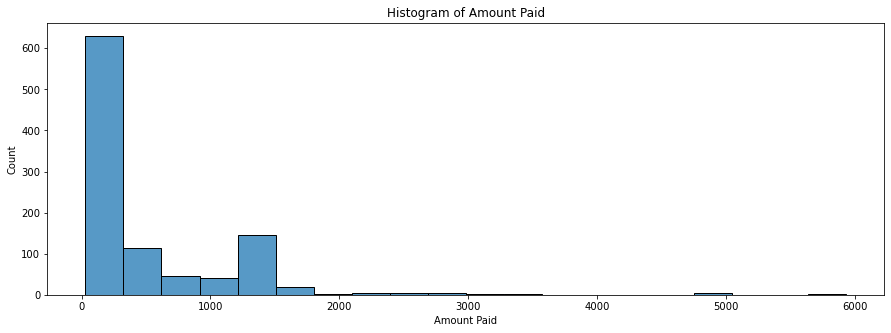

In [29]:
plt.figure(figsize=(15,5))
plt.title('Histogram of Amount Paid')
sns.histplot(data = new_df, x='Amount Paid',bins=20)

<AxesSubplot:title={'center':'Histogram of Quantity'}, xlabel='Quantity', ylabel='Count'>

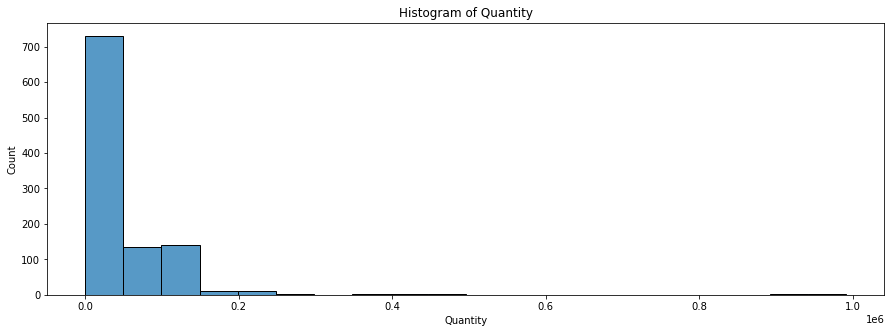

In [30]:
plt.figure(figsize=(15,5))
plt.title('Histogram of Quantity')
sns.histplot(data = new_df, x='Quantity',bins=20)

In [31]:
new_df.head(2)

,Date Prepared,Chemical Name,Exporting/Importing Country,Quantity,Unit(Kg/L),Permit Type,Permit Number,Amount Paid,Date Issued
0,2020-12-17,TOLUENE-DI ISOCYANATE,China,160000.0,Kg,CLEARANCE PERMIT,NCCIP043202000317/12,2000.0,2021-01-05 00:00:00
1,2020-12-21,METHYL ETHYL KETONE,India,1330.0,Kg,CLEARANCE PERMIT,NCCIP028202000321/12,100.0,2021-01-05 00:00:00


In [32]:
new_df.drop(['Date Prepared', 'Date Issued '], axis= 1, inplace=True)

In [33]:
new_df.head(2)

,Chemical Name,Exporting/Importing Country,Quantity,Unit(Kg/L),Permit Type,Permit Number,Amount Paid
0,TOLUENE-DI ISOCYANATE,China,160000.0,Kg,CLEARANCE PERMIT,NCCIP043202000317/12,2000.0
1,METHYL ETHYL KETONE,India,1330.0,Kg,CLEARANCE PERMIT,NCCIP028202000321/12,100.0


In [34]:
new_df.drop(['Exporting/Importing Country','Permit Number'], axis=1, inplace=True)

In [35]:
new_df.head(2)

,Chemical Name,Quantity,Unit(Kg/L),Permit Type,Amount Paid
0,TOLUENE-DI ISOCYANATE,160000.0,Kg,CLEARANCE PERMIT,2000.0
1,METHYL ETHYL KETONE,1330.0,Kg,CLEARANCE PERMIT,100.0


In [36]:
new_df.isnull().sum()

Chemical Name      0
Quantity           0
Unit(Kg/L)         0
Permit Type        0
Amount Paid       19
dtype: int64

In [37]:
Permit_df = new_df.dropna()

In [38]:
Permit_df.isnull().sum()

Chemical Name     0
Quantity          0
Unit(Kg/L)        0
Permit Type       0
Amount Paid       0
dtype: int64

In [39]:
Permit_df.shape

(1020, 5)

In [40]:
Permit_df.columns

Index(['Chemical Name ', 'Quantity', 'Unit(Kg/L)', 'Permit Type',
       'Amount Paid'],
      dtype='object')

<AxesSubplot:xlabel='Quantity', ylabel='Amount Paid'>

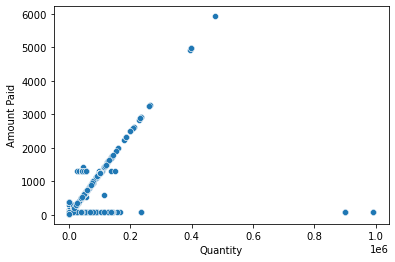

In [41]:
sns.scatterplot(data=Permit_df, x='Quantity', y='Amount Paid')

<AxesSubplot:title={'center':'Boxplot of chemical name and quantity'}, xlabel='Chemical Name ', ylabel='Quantity'>

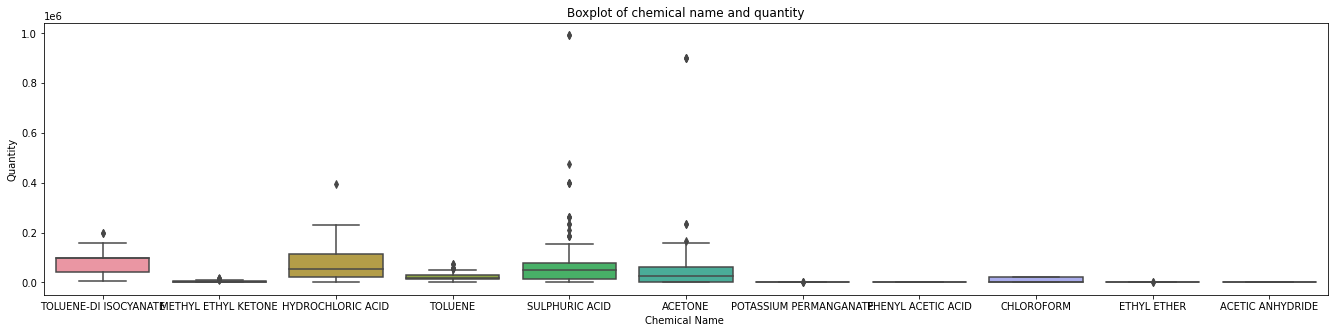

In [42]:
plt.figure(figsize=(23,5))
plt.title("Boxplot of chemical name and quantity")
sns.boxplot(data=Permit_df,x='Chemical Name ',y='Quantity')

<AxesSubplot:title={'center':'Boxplot of chemical name and Amount paid'}, xlabel='Chemical Name ', ylabel='Amount Paid'>

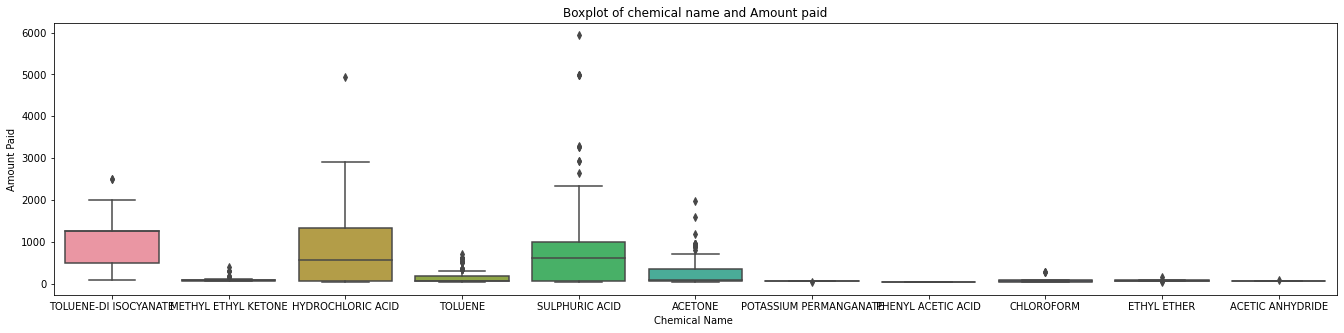

In [43]:
plt.figure(figsize=(23,5))
plt.title("Boxplot of chemical name and Amount paid")
sns.boxplot(data=Permit_df,x='Chemical Name ',y='Amount Paid')

In [44]:
correlation = Permit_df.corr()

<AxesSubplot:>

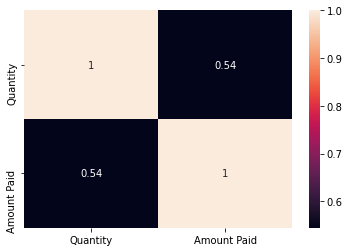

In [45]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

In [46]:
from scipy import stats

In [47]:
corr = stats.pearsonr(Permit_df.Quantity, Permit_df['Amount Paid'])
corr

(0.5444214268019738, 8.94407691392463e-80)

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
new_permit_df = pd.get_dummies(Permit_df, drop_first=True)
new_permit_df.head(5)

,Quantity,Amount Paid,Chemical Name _ACETONE,Chemical Name _CHLOROFORM,Chemical Name _ETHYL ETHER,Chemical Name _HYDROCHLORIC ACID,Chemical Name _METHYL ETHYL KETONE,Chemical Name _PHENYL ACETIC ACID,Chemical Name _POTASSIUM PERMANGANATE,Chemical Name _SULPHURIC ACID,Chemical Name _TOLUENE,Chemical Name _TOLUENE-DI ISOCYANATE,Unit(Kg/L)_L,Permit Type_EXPORT PERMIT,Permit Type_IMPORT AUTHORIZATION,Permit Type_LOCAL PURCHASE AUTH.
0,160000.0,2000.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1330.0,100.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,45500.0,568.75,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,7560.0,75.00,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,28800.0,75.00,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [50]:
Permit_df = new_permit_df.copy()

# The new data frame will be used for the Linear regression model

In [51]:
X = Permit_df.drop('Amount Paid', axis=1)
y = Permit_df['Amount Paid']

In [52]:
X.shape, y.shape

((1020, 15), (1020,))

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

In [57]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [58]:
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
lingreg_rmse = mean_squared_error(y_test, linreg_pred)
print("MAE  of Linear regression model is: ", linreg_mae)
print("R2  of Linear regression model is: ", linreg_r2)
print("RMSE  of Linear regression model is: ", lingreg_rmse)

MAE  of Linear regression model is:  281.6437551175829
R2  of Linear regression model is:  0.4493721033519994
RMSE  of Linear regression model is:  272047.5060325386


In [60]:
new_permit_df.shape

(1020, 16)

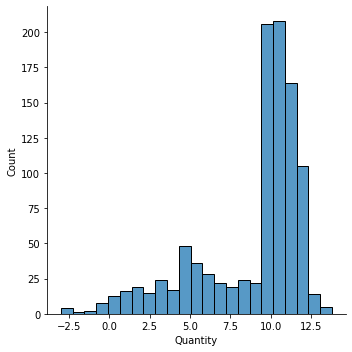

<Figure size 432x288 with 0 Axes>

In [61]:
new_permit_df['Quantity'] = np.log(new_permit_df['Quantity'])
sns.displot(new_permit_df['Quantity'])
fig = plt.figure()

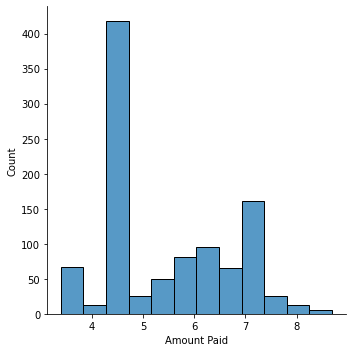

<Figure size 432x288 with 0 Axes>

In [62]:
new_permit_df['Amount Paid'] = np.log(new_permit_df['Amount Paid'])
sns.displot(new_permit_df['Amount Paid'])
fig = plt.figure()

In [66]:
new_permit_df.head(5)

,Quantity,Amount Paid,Chemical Name _ACETONE,Chemical Name _CHLOROFORM,Chemical Name _ETHYL ETHER,Chemical Name _HYDROCHLORIC ACID,Chemical Name _METHYL ETHYL KETONE,Chemical Name _PHENYL ACETIC ACID,Chemical Name _POTASSIUM PERMANGANATE,Chemical Name _SULPHURIC ACID,Chemical Name _TOLUENE,Chemical Name _TOLUENE-DI ISOCYANATE,Unit(Kg/L)_L,Permit Type_EXPORT PERMIT,Permit Type_IMPORT AUTHORIZATION,Permit Type_LOCAL PURCHASE AUTH.
0,11.982929,7.600902,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,7.192934,4.605170,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,10.725468,6.343441,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,8.930626,4.317488,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,10.268131,4.317488,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [64]:
X = new_permit_df.drop(['Amount Paid'], axis = 1)
y = new_permit_df['Amount Paid']

In [65]:
print("shape of x is :", X.shape)
print("shape of y is :", y.shape)

shape of x is : (1020, 15)
shape of y is : (1020,)


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 9) 

# Linear regression model with transformed data

In [67]:
linreg2 = LinearRegression()
linreg2.fit(X_train, y_train)
linreg2_pred = linreg2.predict(X_test)

In [69]:
linreg2_mae = mean_absolute_error(y_test, linreg2_pred)
linreg2_r2 = r2_score(y_test, linreg2_pred)
linreg2_rmse = mean_squared_error(y_test, linreg2_pred)
print("MAE  of Linear regression model is: ", linreg2_mae)
print("R2  of Linear regression model is: ", linreg2_r2)
print("RMSE  of Linear regression model is: ", linreg2_rmse)

MAE  of Linear regression model is:  0.4748458227673405
R2  of Linear regression model is:  0.7880353821192206
RMSE  of Linear regression model is:  0.3768217783625418


In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
ml_score = cross_val_score(linreg2, X_test, y_test, cv=5)
print("linear regression accuracy is: {}".format(ml_score.mean()*100))

linear regression accuracy is: 72.95439032753124


In [72]:
residuals = y_test - linreg2_pred

C:\Users\Kwame\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount Paid', ylabel='Density'>

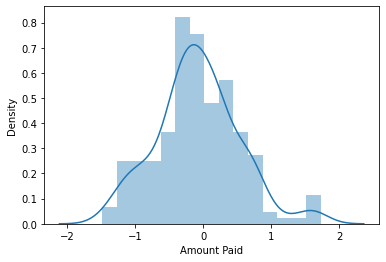

In [73]:
sns.distplot(residuals)

In [74]:
np.mean(residuals)

-0.0821032022082925

In [75]:
import statsmodels.api as sm
import scipy.stats as st

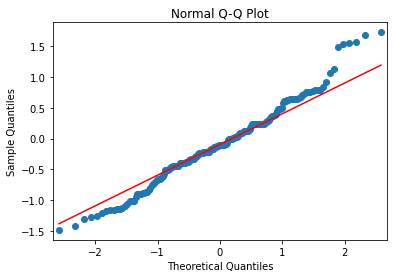

In [76]:
fig = sm.qqplot(data=residuals,line='q', dist=st.norm)
plt.title('Normal Q-Q Plot')
plt.show()

# Decision Tree Model 

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [80]:
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred)
dtree_rmse = mean_squared_error(y_test, dtree_pred)
print("MAE  of decision tree model is: ", dtree_mae)
print("R2  of decision tree model is: ", dtree_r2)
print("RMSE  of decision tree model is: ", dtree_rmse)

MAE  of decision tree model is:  0.273538689336048
R2  of decision tree model is:  0.9045559838632393
RMSE  of decision tree model is:  0.1696763556781265


In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
dtree_score = cross_val_score(dtree, X_test, y_test, cv=5)
print("Decision tree accuracy is: {}".format(dtree_score.mean()*100))

Decision tree accuracy is: 87.03499549527571


# Hyperparameter tuning of Decision Tree

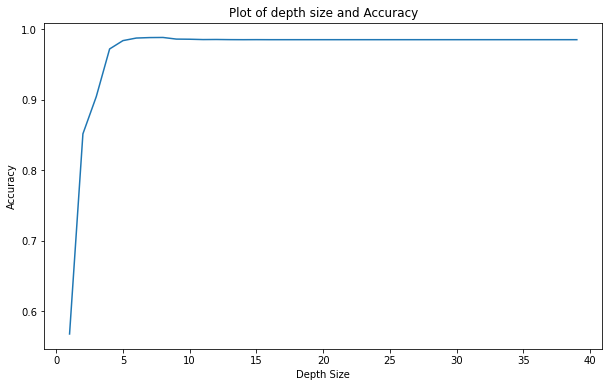

In [83]:
depths = []
scores = []

# Build a regressor
for k in range(1, 40, 1):
    depths.append(k)
    dtree = DecisionTreeRegressor(max_depth=k, random_state=0)
    dtree.fit(X_train, y_train)
    score_new = dtree.score(X_test, y_test)
    scores.append(score_new)

# plot accuracy versus k
plt.figure(figsize=(10, 6))
plt.plot(depths, scores)
plt.xlabel('Depth Size')
plt.ylabel('Accuracy')
plt.title('Plot of depth size and Accuracy')
plt.show()

In [84]:
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree2.fit(X_train, y_train)
dtree2_pred = dtree2.predict(X_test)

In [86]:
dtree2_mae = mean_absolute_error(y_test, dtree2_pred)
dtree2_r2 = r2_score(y_test, dtree2_pred)
dtree2_rmse = mean_squared_error(y_test, dtree2_pred)
print("MAE  of decision tree model is: ", dtree2_mae)
print("R2  of decision tree model is: ", dtree2_r2)
print("RMSE  of decision tree model is: ", dtree2_rmse)

MAE  of decision tree model is:  0.08354758243454737
R2  of decision tree model is:  0.9842010875225952
RMSE  of decision tree model is:  0.02808664179640742


# Random Forest Model 

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
random_forest = RandomForestRegressor(n_estimators = 10, random_state = 0)
random_forest.fit(X_train, y_train)
random_forest = random_forest.predict(X_test)

In [90]:
random_forest_mae = mean_absolute_error(y_test, random_forest)
random_forest_r2 = r2_score(y_test, random_forest)
random_forest_rmse = mean_squared_error(y_test, random_forest)
print("MAE  of random forest model is: ", random_forest_mae)
print("R2  of random forest model is: ", random_forest_r2)
print("RMSE  of random forest model is: ", random_forest_rmse)

MAE  of random forest model is:  0.04133039123310017
R2  of random forest model is:  0.9861943262689726
RMSE  of random forest model is:  0.024543145827030523


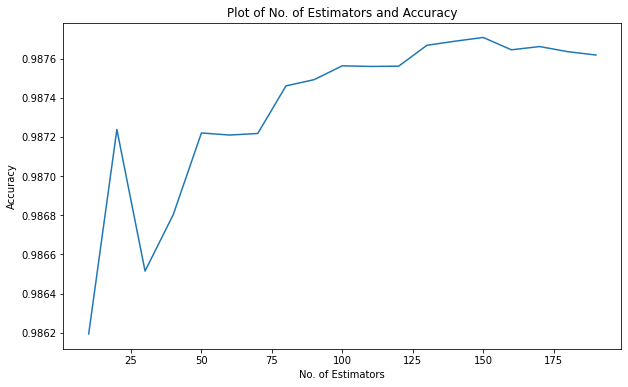

In [91]:
estimators = []
scores = []

# Build Regressor
for k in range(10, 200, 10):
    estimators.append(k)
    RF_regressor = RandomForestRegressor(n_estimators=k, random_state=0)
    RF_regressor.fit(X_train, y_train)
    score_new = RF_regressor.score(X_test, y_test)
    scores.append(score_new)

# plot accuracy versus k
plt.figure(figsize=(10, 6))
plt.plot(estimators, scores)
plt.xlabel('No. of Estimators')
plt.ylabel('Accuracy')
plt.title('Plot of No. of Estimators and Accuracy')
plt.show()

In [92]:
random_forest2 = RandomForestRegressor(n_estimators = 150, random_state = 0)
random_forest2.fit(X_train, y_train)
random_forest2 = random_forest2.predict(X_test)

In [93]:
random_forest2_mae = mean_absolute_error(y_test, random_forest2)
random_forest2_r2 = r2_score(y_test, random_forest2)
random_forest2_rmse = mean_squared_error(y_test, random_forest2)
print("MAE  of random forest model is: ", random_forest2_mae)
print("R2  of random forest model is: ", random_forest2_r2)
print("RMSE  of random forest model is: ", random_forest2_rmse)

MAE  of random forest model is:  0.03944806053825503
R2  of random forest model is:  0.9877077145636519
RMSE  of random forest model is:  0.021852707798949482


# CROSS VALIDATION TO BE SORTED

In [ ]:
random_forest2_score = cross_val_score(random_forest2, X_test, y_test, cv=5)
print("cross validation score for random forest accuracy is: {}".format(random_forest2_score.mean()*100))

# Gradient Boost Model

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

In [96]:
GB_reg = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

In [97]:
GB_reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [98]:
y_pred = GB_reg.predict(X_test)

In [99]:
GB_reg_mae = mean_absolute_error(y_test, y_pred)
GB_reg_r2 = r2_score(y_test, y_pred)
GB_reg_rmse = mean_squared_error(y_test, y_pred)
print("MAE  of Gradient boost model is: ", GB_reg_mae)
print("R2  of Gradient boost model is: ", GB_reg_r2)
print("RMSE of Gradient boost model is: ", GB_reg_rmse)

MAE  of Gradient boost model is:  0.3322188785048196
R2  of Gradient boost model is:  0.8922320140386145
RMSE of Gradient boost model is:  0.19158539064930014


In [99]:
from sklearn.model_selection import GridSearchCV

In [102]:
GB_reg2 = {'learning_rate':[0.15,0.1,0.10,0.05], 'n_estimators':[10,30,50,100],'max_depth':[2,4,6,8]}
tuning = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=GB_reg2, scoring='r2')
tuning.fit(X_train, y_train)
tuning.best_params_,tuning.best_score_

({'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100},
 0.982561393359006,
 False)

In [103]:
GB_score = cross_val_score(tuning, X_test, y_test, cv=5)
print("Cross validation score for Gradient boosting accuracy is: {}".format(GB_score.mean()*100))

Gradient boosting accuracy is: 97.04207299894362


In [100]:
GB2_reg = GradientBoostingRegressor(max_depth=4,n_estimators=100,learning_rate=0.1)

In [101]:
GB2_reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4)

In [102]:
y_pred2 = GB2_reg.predict(X_test)

In [103]:
GB2_reg_mae = mean_absolute_error(y_test, y_pred2)
GB2_reg_r2 = r2_score(y_test, y_pred2)
GB2_reg_rmse = mean_squared_error(y_test, y_pred2)
print("MAE  of Gradient boost model is: ", GB2_reg_mae)
print("R2  of Gradient boost model is: ", GB2_reg_r2)
print("RMSE of Gradient boost model is: ", GB2_reg_rmse)

MAE  of Gradient boost model is:  0.045660173924289456
R2  of Gradient boost model is:  0.9887774826827239
RMSE of Gradient boost model is:  0.019950919051871987


# 